In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# To enable plotting graphs in Jupyter notebook
%matplotlib inline

#Sklearn package's data splitting function which is based on random function
from sklearn.model_selection import train_test_split

#For logistic Regression model
from sklearn.linear_model import LogisticRegression # Focused Algorithm 
from sklearn.model_selection import GridSearchCV

import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

import statsmodels.formula.api as SM

from sklearn import metrics
# calculate accuracy measures and confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
bank = pd.read_csv('bank-full.csv',sep=';')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
bank.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [4]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


<AxesSubplot:xlabel='age'>

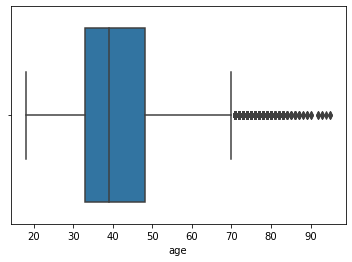

In [5]:
sns.boxplot(x='age',data=bank)

From the plot in the above we can see that there are outliers in the age. Hence there is possibility that some of the accounts might be fake

<AxesSubplot:xlabel='y', ylabel='age'>

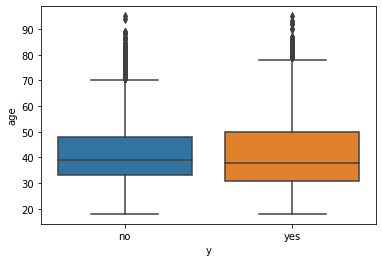

In [6]:
sns.boxplot(x='y',y='age',data=bank)

From the data above, people who are in the age ranging from 30-35, 48-50 and 70-78 are likely to subscribe to a term-deposit

In [7]:
month_dict = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
    'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}

bank['month'] = bank['month'].map(month_dict)

In [8]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  int64 
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(8), object(9)
memory usage: 5.9+ MB


In [9]:
ct = pd.crosstab(index=bank['education'],
           columns=bank['y'],
           values = bank['y'],
           aggfunc='count')
ct

y,no,yes
education,,
primary,6260,591
secondary,20752,2450
tertiary,11305,1996
unknown,1605,252


<AxesSubplot:xlabel='education'>

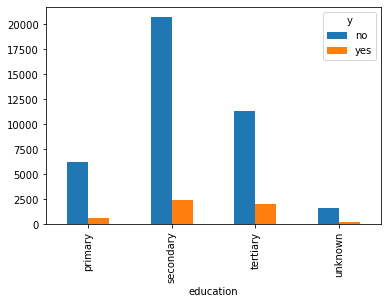

In [10]:
ct.plot(kind='bar')

From the graph above the people who are educated till secondary are more in number are also stand in the top position in subscribing a term deposit

In [11]:
ct = pd.crosstab(index=bank['marital'],
           columns=bank['y'],
           values = bank['y'],
           aggfunc='count')
ct

y,no,yes
marital,,
divorced,4585,622
married,24459,2755
single,10878,1912


<AxesSubplot:xlabel='marital'>

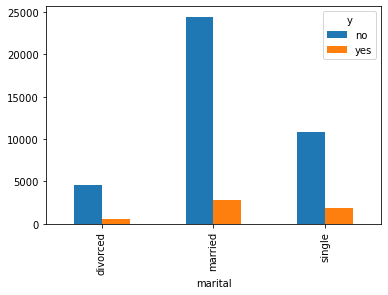

In [12]:
ct.plot(kind='bar')

In [13]:
ct = pd.crosstab(index=bank['default'],
           columns=bank['y'],
           values = bank['y'],
           aggfunc='count')
ct

y,no,yes
default,,
no,39159,5237
yes,763,52


<AxesSubplot:xlabel='default'>

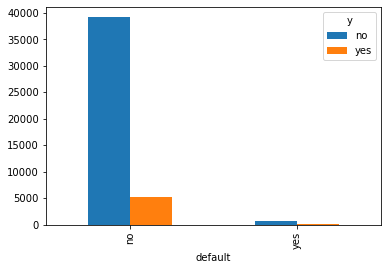

In [14]:
ct.plot(kind='bar')

In [15]:
ct = pd.crosstab(index=bank['loan'],
           columns=bank['y'],
           values = bank['y'],
           aggfunc='count')
ct

y,no,yes
loan,,
no,33162,4805
yes,6760,484


<AxesSubplot:xlabel='loan'>

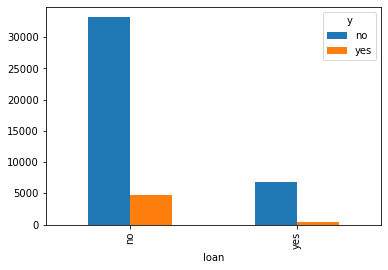

In [16]:
ct.plot(kind='bar')

<AxesSubplot:xlabel='y', ylabel='duration'>

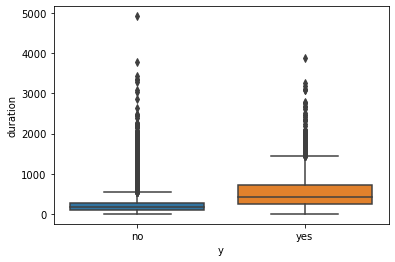

In [17]:
sns.boxplot(x='y',y='duration',data=bank)

In [18]:
def outliers_to_median_values(df,column_name):
    
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

    # Calculate the median of the non-outlier data
    median = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)][column_name].median()

    # Replace outliers with the median
    df.loc[(df[column_name] < lower_bound) | (df[column_name] > upper_bound), column_name] = median
    print('Distribution after outlier removal')
    sns.boxplot(x=column_name,data=df)
    plt.show()

Distribution after outlier removal


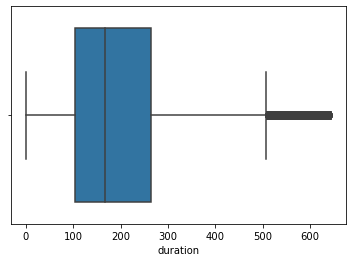

In [19]:
outliers_to_median_values(bank,'duration')

Distribution after outlier removal


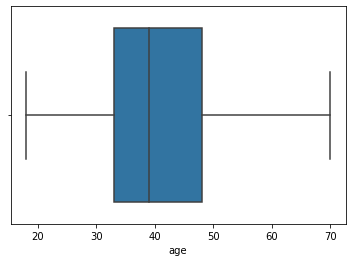

In [20]:
outliers_to_median_values(bank,'age')

Distribution after outlier removal


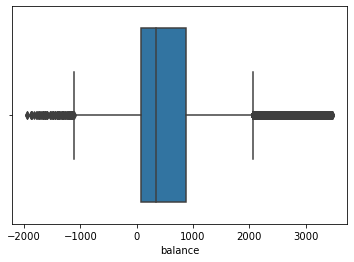

In [21]:
outliers_to_median_values(bank,'balance')

In [22]:
X = bank.drop(['y'], axis=1)

In [23]:
#Calculates VIF
def vif_cal(input_data):
    x_vars=input_data
    xvar_names=input_data.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=SM.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

In [24]:
X = pd.get_dummies(X,drop_first=True)
X.shape

(45211, 32)

In [25]:
bank['y'] = bank['y'].replace({'no': 0, 'yes': 1})

In [26]:
Y = bank['y']
Y.shape

(45211,)

In [27]:
vif_cal(X)

age  VIF =  1.48
balance  VIF =  1.04
day  VIF =  1.05
month  VIF =  1.11
duration  VIF =  1.03
campaign  VIF =  1.07
pdays  VIF =  4.52
previous  VIF =  1.41
job_blue-collar  VIF =  2.5
job_entrepreneur  VIF =  1.3
job_housemaid  VIF =  1.29
job_management  VIF =  3.02
job_retired  VIF =  1.56
job_self-employed  VIF =  1.32
job_services  VIF =  1.65
job_student  VIF =  1.25
job_technician  VIF =  2.09
job_unemployed  VIF =  1.24
job_unknown  VIF =  1.09
marital_married  VIF =  2.53
marital_single  VIF =  2.86
education_secondary  VIF =  2.59
education_tertiary  VIF =  3.37
education_unknown  VIF =  1.3
default_yes  VIF =  1.02
housing_yes  VIF =  1.21
loan_yes  VIF =  1.03
contact_telephone  VIF =  1.07
contact_unknown  VIF =  1.26
poutcome_other  VIF =  1.34
poutcome_success  VIF =  1.38
poutcome_unknown  VIF =  5.97


In [28]:
X = X.drop(columns='poutcome_unknown')

In [29]:
vif_cal(X)

age  VIF =  1.48
balance  VIF =  1.04
day  VIF =  1.05
month  VIF =  1.11
duration  VIF =  1.03
campaign  VIF =  1.06
pdays  VIF =  1.57
previous  VIF =  1.32
job_blue-collar  VIF =  2.5
job_entrepreneur  VIF =  1.3
job_housemaid  VIF =  1.29
job_management  VIF =  3.02
job_retired  VIF =  1.56
job_self-employed  VIF =  1.32
job_services  VIF =  1.65
job_student  VIF =  1.25
job_technician  VIF =  2.09
job_unemployed  VIF =  1.24
job_unknown  VIF =  1.09
marital_married  VIF =  2.53
marital_single  VIF =  2.86
education_secondary  VIF =  2.59
education_tertiary  VIF =  3.37
education_unknown  VIF =  1.3
default_yes  VIF =  1.02
housing_yes  VIF =  1.21
loan_yes  VIF =  1.03
contact_telephone  VIF =  1.07
contact_unknown  VIF =  1.24
poutcome_other  VIF =  1.25
poutcome_success  VIF =  1.13


In [30]:
#Standardize/Normalize of X - in order to prevent warnings during model fitting
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [31]:
#Train-Test Split (70 : 30)
#Used stratify for class imbalance
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.30,stratify=Y)

In [32]:
bank.shape

(45211, 17)

In [33]:
X_train.shape

(31647, 31)

In [34]:
y_train.shape

(31647,)

In [35]:
X_test.shape

(13564, 31)

In [36]:
y_test.shape

(13564,)

In [37]:
model = LogisticRegression(class_weight='balanced')

In [38]:
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [39]:
y_train_pred = model.predict(X_train)

In [40]:
metrics.accuracy_score(y_train, y_train_pred)

0.7432300060037287

In [41]:
y_test_pred = model.predict(X_test)

In [42]:
metrics.accuracy_score(y_test, y_test_pred)

0.7457239752285462

Since train-test scores are almost equal we can say that the model is performing good

In [43]:
confusion_matrix(y_test, y_test_pred)

array([[9032, 2945],
       [ 504, 1083]], dtype=int64)

By the confusion matrix above, we have<br>
TN - 9032<br>
FP - 2945<br>
FN - 504<br>
TP - 1083<br>

By the above data, we can say that the model has predicted:<br>
Out of 11977 values of Class-0, Model correctly predicted 9032 values as Class-0<br>
Out of 1587 values of Class-1, Model correctly predicted 1083 values as Class-1<br>

Let's see the other metrics

In [44]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.95      0.75      0.84     11977
           1       0.27      0.68      0.39      1587

    accuracy                           0.75     13564
   macro avg       0.61      0.72      0.61     13564
weighted avg       0.87      0.75      0.79     13564



In [45]:
y_pred = model.predict(X_scaled)

Text(0, 0.5, 'True Positive Rate')

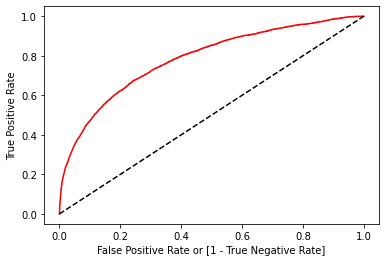

In [46]:
fpr, tpr, thresholds = roc_curve(Y, model.predict_proba(X_scaled)[:,1])

auc = roc_auc_score(Y, y_pred)

plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [47]:
auc

0.7147903030876176